<a href="https://colab.research.google.com/github/avats007/PROJECTS/blob/main/MNIST_Digit_classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Dependencies

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
# Loading the MNIST data from Keras.datasets

(X_train, Y_train),(X_test,Y_test) = mnist.load_data()


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays

print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# Training data = 60,000 Images
# Test data = 10,000 Images
# Image dimension --> 28x28
# Grayscale-Image -->1 channel

# printing the 10th image
print(X_train[10]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


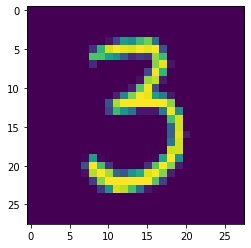

3


In [ ]:
# displaying image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

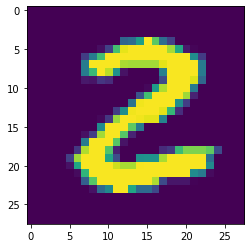

2


In [ ]:
# displaying image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# We can use this label as such or we can also apply One Hot Encoding

# All the images have same dimensions in this dataset, If not, we have to resize all the images to a common dimension

# Scaling the values (called normalization)
X_train = X_train/255
X_test = X_test/255



In [ ]:
# printing the 10th image
print(X_train[10]) 

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# Building the Neural Network

# setting up the layers of the Neural Network
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(50, activation = 'relu'),
     keras.layers.Dense(50, activation = 'relu'),
     keras.layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
# training the Neural Network

model.fit(X_train,Y_train,epochs=15)


Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

Training data accuracy = 98.9%

Accuracy on Test data:

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1222 - accuracy: 0.9707
0.9707000255584717


Test data accuracy = 97.1%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


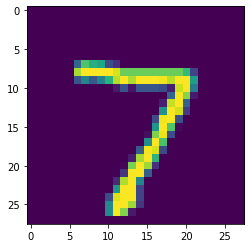

In [ ]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[2.5307238e-03 9.2180431e-01 1.9769484e-01 7.6272988e-01 1.7862151e-06
 2.3272689e-05 2.8240389e-11 9.9999928e-01 2.0453334e-04 9.9178052e-01]


model.predict() gives the prediction probability of each class (0-9) for the data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image )

7


In [ ]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 3, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 8, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    1    2    1    1    3    1]
 [   0 1117    0    5    0    2    2    0    8    1]
 [   2    0 1014    3    1    0    0    4    7    1]
 [   0    0    5  984    0    4    0    5    4    8]
 [   0    2    8    0  950    0    3    1    4   14]
 [   2    0    0   27    2  847    1    1    9    3]
 [   8    3    3    1    4   10  921    2    6    0]
 [   1    1   12    4    0    0    0  990    4   16]
 [   3    1   10    7    4    6    2    2  935    4]
 [   1    5    2    6    8    5    1    5    7  969]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

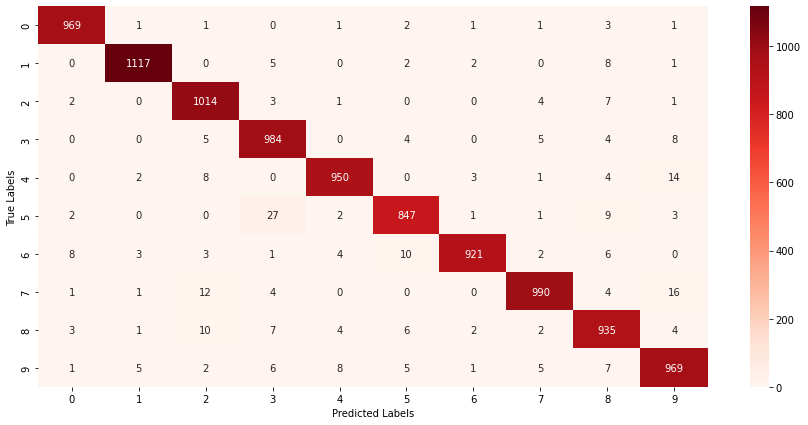

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt ='d', cmap = 'Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Now Building a Predective System

**Predictive** **System**

Path of the image to be predicted: /content/img_3_mnist.png


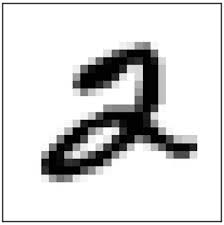

The Handwritten Digit is recognized as  2


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognized as ',input_pred_label)